In [1]:
try:
    # install for jupyterlite if needed
    import piplite
    print('installing piplite packages... This may take up to ~5 minutes. If still running, please try refreshing the page.')
    await piplite.install(['mathpad', 'nbformat>=5.6', 'ipywidgets>=7,<8'])
    print('piplite packages installed and ready to go!')
    in_jupyterlite = True

except (ImportError, SyntaxError):
    # not running in jupyterlite
    in_jupyterlite = False


![Simple Pendulum Problem Diagram](imgs/simple_pendulum.png)

In [3]:
from mathpad import *

# simple pendulum example using lagrange

theta = "theta(t)" * rad
m = "m" * kg
l = "l" * meters
g = "g" * meters / second ** 2

O = R2("O") * meters

NameError: name 'Union' is not defined

In [ ]:
print("Displacement of pendulum")
r = O.from_polar(l, theta - pi/2)
r

Displacement of pendulum


[l*sin(theta(t)), -l*cos(theta(t))] wrt. O

In [ ]:
print("Velocity of pendulum")
# abs velocity of pendulum
v = diff(r)
v

Velocity of pendulum


[l*cos(theta(t))*Derivative(theta(t), t), l*sin(theta(t))*Derivative(theta(t), t)] wrt. O

In [ ]:
print("Absolute velocity of pendulum")
v_abs = v.norm()
v_abs

Absolute velocity of pendulum


(l**2*sin(theta(t))**2*Derivative(theta(t), t)**2 + l**2*cos(theta(t))**2*Derivative(theta(t), t)**2)**0.5 meters/second

In [ ]:
from mathpad.mech import euler_lagrange, kinetic_energy, gravitational_energy

print("Kinetic energy of pendulum")
T = kinetic_energy(m=m, v=v_abs)
T

Kinetic energy of pendulum


0.5*m*(l**2*sin(theta(t))**2*Derivative(theta(t), t)**2 + l**2*cos(theta(t))**2*Derivative(theta(t), t)**2) joules

In [ ]:
print("Potential energy of pendulum")
V = gravitational_energy(m=m, h=r.j, g=g)
V

Potential energy of pendulum


-g*l*m*cos(theta(t)) kilogram*meters**2/second**2

In [ ]:
diff(T-V, wrt=theta)

-g*l*m*sin(theta(t)) joules/radian

In [ ]:
theta_dynamics = euler_lagrange(KE=T, PE=V, NCF=0 * newton * meter, var=theta)
theta_dynamics

g*l*m*sin(theta(t)) + 0.5*m*(2*l**2*sin(theta(t))**2*Derivative(theta(t), (t, 2)) + 2*l**2*cos(theta(t))**2*Derivative(theta(t), (t, 2))) = 0 joule/radian

Solving subbed Equations...
Solving finished.
Simulating from t=0 to t=5 with a max_step of 0.01.


Simulation finished. Plotting...


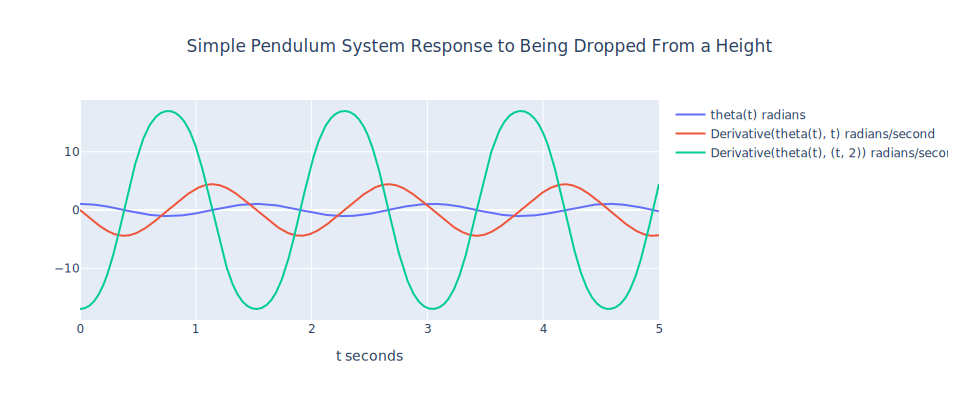

In [ ]:
sim_data = simulate_dynamic_system(
    [theta_dynamics],
    plot_title="Simple Pendulum System Response to Being Dropped From a Height",
    x_final=5, max_step=0.01,
    substitute={
        g: 9.81,
        l: 0.5
    },
    initial_conditions={
        theta: pi / 3,
        diff(theta): 0
    },
    record=[theta, diff(theta), diff(theta, 2)],
    plot_static=not in_jupyterlite
)